In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
import os

In [5]:
df = pd.read_csv('/home/d_nguyen11/Documents/reu_stats_2024/HAR/ppg+dalia/data/PPG_FieldStudy/S1/S1_E4/ACC.csv', header=0)

In [6]:
df.columns = ['acc_x', 'acc_y', 'acc_z']

In [7]:
df

,acc_x,acc_y,acc_z
0,32.0,32.0,32.0
1,-27.0,1.0,58.0
2,-27.0,2.0,59.0
3,-27.0,1.0,59.0
4,-27.0,1.0,58.0
...,...,...,...
298946,-24.0,0.0,60.0
298947,-24.0,-1.0,60.0
298948,-24.0,0.0,60.0
298949,-24.0,0.0,60.0


In [8]:
df["datetime"] = pd.to_datetime(df.index / 32, unit="s", origin="2024-01-01")


In [9]:
df

,acc_x,acc_y,acc_z,datetime
0,32.0,32.0,32.0,2024-01-01 00:00:00.000000
1,-27.0,1.0,58.0,2024-01-01 00:00:00.031250
2,-27.0,2.0,59.0,2024-01-01 00:00:00.062500
3,-27.0,1.0,59.0,2024-01-01 00:00:00.093750
4,-27.0,1.0,58.0,2024-01-01 00:00:00.125000
...,...,...,...,...
298946,-24.0,0.0,60.0,2024-01-01 02:35:42.062500
298947,-24.0,-1.0,60.0,2024-01-01 02:35:42.093750
298948,-24.0,0.0,60.0,2024-01-01 02:35:42.125000
298949,-24.0,0.0,60.0,2024-01-01 02:35:42.156250


In [11]:
act_df = pd.read_csv('/home/d_nguyen11/Documents/reu_stats_2024/HAR/ppg+dalia/data/PPG_FieldStudy/S1/S1_activity.csv', header=0)

In [12]:
act_df

,# SUBJECT_ID,S1
0,# NO_ACTIVITY,0
1,# BASELINE,90
2,# NO_ACTIVITY,791
3,# STAIRS,837
4,# NO_ACTIVITY,1125
5,# SOCCER,1210
6,# NO_ACTIVITY,1556
7,# CYCLING,1918
8,# NO_ACTIVITY,2331
9,# DRIVING,2935


In [13]:
act_df.columns = ['act_name', 'S1']

In [14]:
act_df['timedelta'] = pd.to_timedelta(act_df['S1'], unit = 's')

In [15]:
starting_time = pd.Timestamp('2024-01-01 00:00:00')
act_df['datetime'] = starting_time + act_df['timedelta']

In [16]:
act_df['activity'] = act_df['act_name'].apply(lambda x: 0 if x in ['# NO_ACTIVITY', '# BASELINE', '# DRIVING', '# LUNCH', "# CLEAN_BASELINE"] else 1)

In [17]:
act_df

,act_name,S1,timedelta,datetime,activity
0,# NO_ACTIVITY,0,00:00:00,2024-01-01 00:00:00,0
1,# BASELINE,90,00:01:30,2024-01-01 00:01:30,0
2,# NO_ACTIVITY,791,00:13:11,2024-01-01 00:13:11,0
3,# STAIRS,837,00:13:57,2024-01-01 00:13:57,1
4,# NO_ACTIVITY,1125,00:18:45,2024-01-01 00:18:45,0
5,# SOCCER,1210,00:20:10,2024-01-01 00:20:10,1
6,# NO_ACTIVITY,1556,00:25:56,2024-01-01 00:25:56,0
7,# CYCLING,1918,00:31:58,2024-01-01 00:31:58,1
8,# NO_ACTIVITY,2331,00:38:51,2024-01-01 00:38:51,0
9,# DRIVING,2935,00:48:55,2024-01-01 00:48:55,0


In [18]:
for i, row in act_df.iterrows():
    start_time = row['datetime']
    end_time = act_df.iloc[i + 1]['datetime'] if i < len(act_df) - 1 else pd.Timestamp('2024-01-01 23:59:59')
    activity_value = row['activity']
    df.loc[(df['datetime'] >= start_time) & (df['datetime'] < end_time), 'activity'] = activity_value

In [21]:
df['activity'] = df['activity'].astype(int)
df

,acc_x,acc_y,acc_z,datetime,activity
0,32.0,32.0,32.0,2024-01-01 00:00:00.000000,0
1,-27.0,1.0,58.0,2024-01-01 00:00:00.031250,0
2,-27.0,2.0,59.0,2024-01-01 00:00:00.062500,0
3,-27.0,1.0,59.0,2024-01-01 00:00:00.093750,0
4,-27.0,1.0,58.0,2024-01-01 00:00:00.125000,0
...,...,...,...,...,...
298946,-24.0,0.0,60.0,2024-01-01 02:35:42.062500,0
298947,-24.0,-1.0,60.0,2024-01-01 02:35:42.093750,0
298948,-24.0,0.0,60.0,2024-01-01 02:35:42.125000,0
298949,-24.0,0.0,60.0,2024-01-01 02:35:42.156250,0


In [22]:
df['activity'].mean()

0.3202665319734672

In [24]:
def magnitude(x, y, z):
  return (x**2 + y**2 + z**2)**(1/2)

df['magnitude'] = magnitude(df['acc_x'], df['acc_y'], df['acc_z'])
df.to_csv('/home/d_nguyen11/Documents/reu_stats_2024/HAR/ppg+dalia/data/PPG_FieldStudy/S1/S1_E4/ACC_with_activity.csv')

In [25]:
def df_constructor(ind):
  df = pd.read_csv(f'/home/d_nguyen11/Documents/reu_stats_2024/HAR/ppg+dalia/data/PPG_FieldStudy/S{ind}/S{ind}_E4/ACC.csv', header=0)
  df.columns = ['acc_x', 'acc_y', 'acc_z']
  df["datetime"] = pd.to_datetime(df.index / 32, unit="s", origin="2024-01-01")

  act_df = pd.read_csv(f'/home/d_nguyen11/Documents/reu_stats_2024/HAR/ppg+dalia/data/PPG_FieldStudy/S{ind}/S{ind}_activity.csv', header=0)
  act_df.columns = ['act_name', f'S{ind}']
  act_df['timedelta'] = pd.to_timedelta(act_df[f'S{ind}'], unit = 's')
  starting_time = pd.Timestamp('2024-01-01 00:00:00')
  act_df['datetime'] = starting_time + act_df['timedelta']
  act_df['activity'] = act_df['act_name'].apply(lambda x: 0 if x in ['# NO_ACTIVITY', '# BASELINE', '# DRIVING', '# LUNCH', "# CLEAN_BASELINE", "# WORKING"] else 1)

  for i, row in act_df.iterrows():
      start_time = row['datetime']
      end_time = act_df.iloc[i + 1]['datetime'] if i < len(act_df) - 1 else pd.Timestamp('2024-01-01 23:59:59')
      activity_value = row['activity']
      df.loc[(df['datetime'] >= start_time) & (df['datetime'] < end_time), 'activity'] = activity_value

  df['activity'] = df['activity'].astype(int)
  df['magnitude'] = magnitude(df['acc_x'], df['acc_y'], df['acc_z'])

  if os.path.exists(f'/home/d_nguyen11/Documents/reu_stats_2024/HAR/ppg+dalia/data/PPG_FieldStudy/S{ind}/S{ind}_E4/ACC_with_activity.csv'):
    os.remove(f'//home/d_nguyen11/Documents/reu_stats_2024/HAR/ppg+dalia/data/PPG_FieldStudy/S{ind}/S{ind}_E4/ACC_with_activity.csv')

  df.to_csv(f'/home/d_nguyen11/Documents/reu_stats_2024/HAR/ppg+dalia/data/PPG_FieldStudy/S{ind}/S{ind}_E4/ACC_with_activity.csv')
  return df

In [26]:
for i in range(1, 16):
  df_constructor(i)

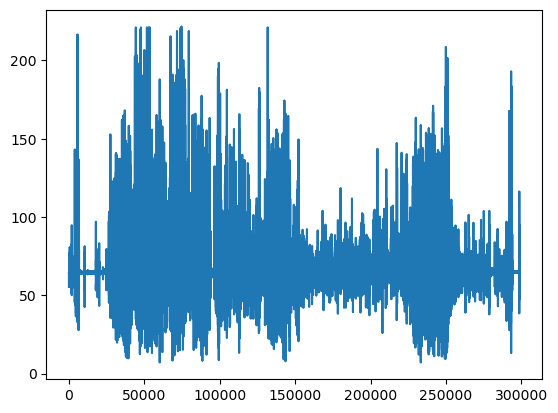

In [27]:
plt.plot(df.index, df['magnitude'])
plt.show()

In [28]:
n = len(df['magnitude'])
f_hat = np.fft.fft(df['magnitude'])
PSD = f_hat * np.conj(f_hat) / n
freq = (1/n)  * np.arange(n)
L = np.arange(1, np.floor(int(n/16)), dtype='int')
L

array([    1,     2,     3, ..., 18681, 18682, 18683])

/usr/lib/python3/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


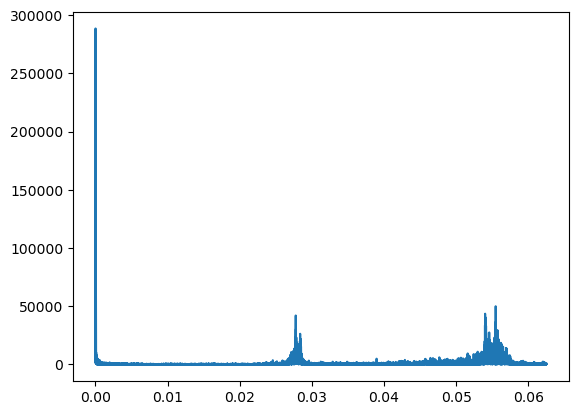

In [29]:
plt.plot(freq[L], PSD[L])
plt.show()